In [1]:
import numpy as np
from node import Node

L1 = 4
L2 = 4
D = 8

#   u
# l   r
#   d

def _node(s):
    l = [D]*len(s)
    l.append(2)
    return Node(list(s)+["p"],l)

def node_in_lattice(i,j):
    s = "udrl"
    if i == 0:
        s = s.replace("u","")
    if i == L1-1:
        s = s.replace("d","")
    if j == 0:
        s = s.replace("l","")
    if j == L2-1:
        s = s.replace("r","")
    return _node(s)

lattice = [[node_in_lattice(i,j) for j in range(L2)] for i in range(L1)]

ep = 0.1

H = np.reshape([[0.25,0,0,0],[0,-0.25,0.5,0],[0,0.5,-0.25,0],[0,0,0,0.25]],[2,2,2,2])
I = np.reshape(np.identity(4),[2,2,2,2])
Energy = []

In [14]:
ep = 0.01
expH = I - ep*H
for t in range(100):
    for i in range(0,L1):
        for j in range(0,L2-1,2):
            Node.update(lattice[i][j],lattice[i][j+1],"r","l","p","p",expH)
    for i in range(0,L1):
        for j in range(1,L2-1,2):
            Node.update(lattice[i][j],lattice[i][j+1],"r","l","p","p",expH)
    for j in range(0,L2):
        for i in range(0,L1-1,2):
            Node.update(lattice[i][j],lattice[i+1][j],"d","u","p","p",expH)
    for j in range(0,L2):
        for i in range(1,L1-1,2):
            Node.update(lattice[i][j],lattice[i+1][j],"d","u","p","p",expH)
    if t % 10 == 0:
        latt = [[Node.copy(j) for j in i]for i in lattice]
        tmp = Node([], [], data = [1], normf=False)
        for i,x in enumerate(latt):
            for j,y in enumerate(x):
                for k in ["u","d","r","l","p"]:
                    if k in y.tags:
                        y.rename_leg({k:k+str(i)+str(j)})
        for i,j in enumerate(latt):
            for k,p in enumerate(j):
                tags1 = []
                tags2 = []
                if (i-1) in range(4):
                    tags1.append("d%s%s"%(str(i-1),str(k)))
                    tags2.append("u%s%s"%(str(i),str(k)))
                if (k-1) in range(4):
                    tags1.append("r%s%s"%(str(i),str(k-1)))
                    tags2.append("l%s%s"%(str(i),str(k)))
                tmp = Node.contract(tmp, tags1, p, tags2)
        norm = Node.contract(tmp, ["p%s%s" % (str(i),str(j)) for j in range(4) for i in range(4)] \
                             , tmp, ["p%s%s" % (str(i),str(j)) for j in range(4) for i in range(4)])
        H_ = Node(["d1","d2","u1","u2"], [2,2,2,2], np.array(H), normf=False)
        E = np.array([0.0])
        for i in range(4):
            for j in range(3):
                tmp2 = Node.contract(tmp, ["p%s%s"%(str(i),str(j)), "p%s%s"%(str(i),str(j+1))], H_, ["d1","d2"], {}, \
                                     {"u1":"p%s%s"%(str(i),str(j)),"u2":"p%s%s"%(str(i),str(j+1))})
                tmp2 = Node.contract(tmp2, ["p%s%s" % (str(p),str(q)) for p in range(4) for q in range(4)], tmp, \
                                     ["p%s%s" % (str(p),str(q)) for p in range(4) for q in range(4)])
                E += tmp2.data / norm.data
                tmp2 = Node.contract(tmp, ["p%s%s"%(str(j),str(i)), "p%s%s"%(str(j+1),str(i))], H_, ["d1","d2"], {}, \
                                     {"u1":"p%s%s"%(str(j),str(i)),"u2":"p%s%s"%(str(j+1),str(i))})
                tmp2 = Node.contract(tmp2, ["p%s%s" % (str(p),str(q)) for p in range(4) for q in range(4)], tmp, \
                                     ["p%s%s" % (str(p),str(q)) for p in range(4) for q in range(4)])
                E += tmp2.data / norm.data
        Energy.append(E.tolist()[0] / 16)

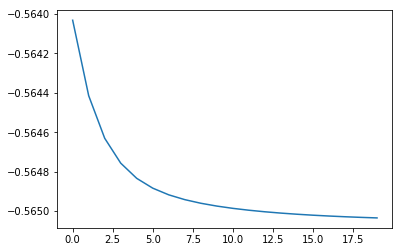

In [15]:
plt.plot(Energy)
plt.show()

In [16]:
Energy[-1]

-0.5650349632522405

In [4]:
import matplotlib.pyplot as plt

In [10]:
Energy = []